In [10]:
#Import necessary libraries
import pandas as pd
import spacy
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle

In [11]:
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

In [12]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [13]:
# Print the first five rows of the DataFrame
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [16]:
# Define a function to preprocess text
def preprocess_text(text):
    # Create a spaCy document object
    doc = nlp(text)

    # Clean the text by removing stop words, punctuation, and non-alphabetic characters
    clean = []
    for token in doc:
        if not token.is_stop and not token.is_punct and token.is_alpha:
            clean.append(token.lemma_.lower())
    # Return the cleaned text as a string
    return " ".join(clean)

In [17]:
# Apply the preprocess_text function to the Resume column and store the result in a new column
df['Resume_text'] = df['Resume'].apply(preprocess_text)

In [18]:
# Print the DataFrame with the new column
df

,Category,Resume,Resume_text
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python pandas numpy...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details uit rgpv data scientist data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient ms office word basic...
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness learn ...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge ms power po...


In [19]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

In [20]:
# Encode the Category column and store the result in a new column
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

In [21]:
# Print the first five rows of the DataFrame
df.head()

,Category,Resume,Resume_text,Category_Encoded
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python pandas numpy...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details uit rgpv data scientist data...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,6


In [26]:
# Print the value counts of the Category and Category_Encoded columns
df[['Category', 'Category_Encoded']].value_counts()

Category                   Category_Encoded
Java Developer             15                  84
Testing                    23                  70
DevOps Engineer            8                   55
Python Developer           20                  48
Web Designing              24                  45
HR                         12                  44
Hadoop                     13                  42
Data Science               6                   40
Operations Manager         18                  40
Sales                      22                  40
Blockchain                 3                   40
ETL Developer              10                  40
Mechanical Engineer        16                  40
Arts                       1                   36
Database                   7                   33
Electrical Engineering     11                  30
Health and fitness         14                  30
PMO                        19                  30
Business Analyst           4                   28
DotNet

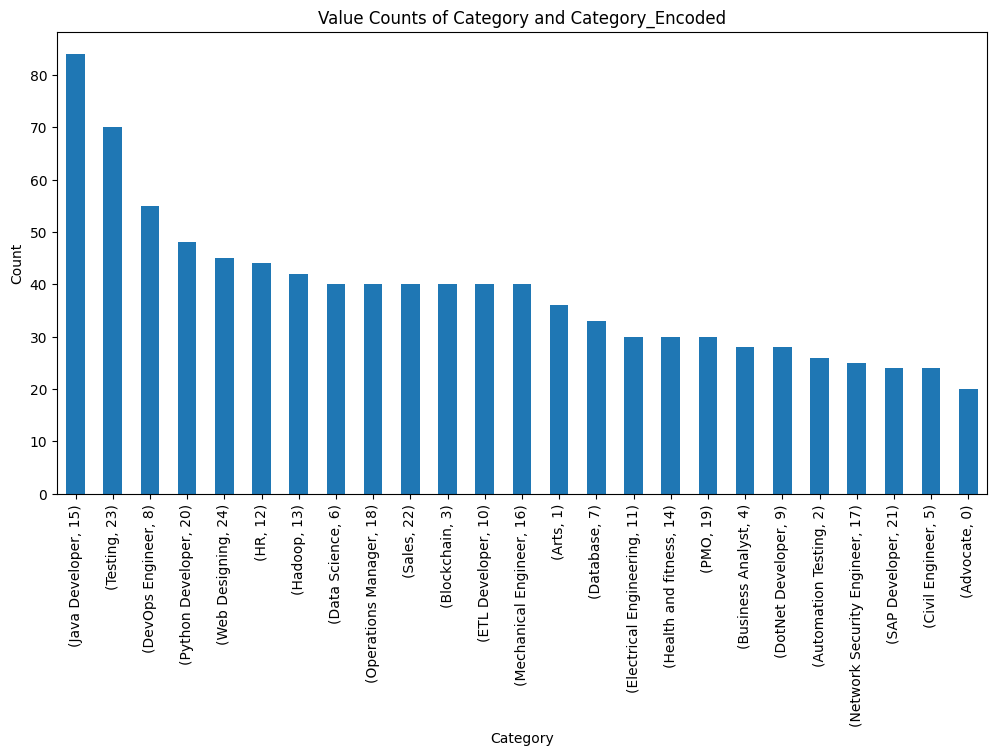

In [31]:
value_counts = df[['Category', 'Category_Encoded']].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
value_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Category and Category_Encoded')
plt.show()

In [34]:
# Print the first element of the Resume column
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [35]:
# Print the first element of the Resume_text column
df.Resume_text[0]

'skill programming language python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm bayes knn random forest decision trees boost technique cluster analysis word embed sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch plotly kibana matplotlib ggplot tableau regular expression html css angular logstash kafka python flask git docker computer vision open cv understanding deep learning education details data science assurance associate data science assurance associate ernst young llp skill details exprience month exprience month exprience monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assist accelerate review process run analytic generate report core member team help develop automate review pla

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Resume_text'], df['Category_Encoded'], test_size=0.20, random_state=2, stratify=df['Category'])

In [37]:
# Create a pipeline consisting of a TfidfVectorizer and a KNeighborsClassifier
model1 =Pipeline([('vectorizer', TfidfVectorizer()), ('model', KNeighborsClassifier())])
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

In [38]:
# Print the classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.73      1.00      0.84         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       0.90      1.00      0.95         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00         8
          17       1.00    

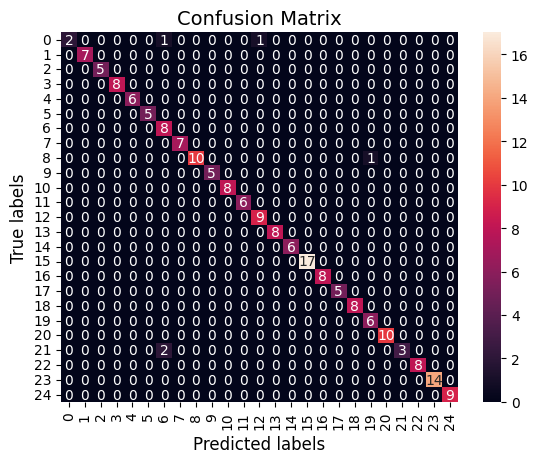

In [39]:
# Compute and display the confusion matrix
cm_matrix = confusion_matrix(y_test, y_pred1)

ax = plt.subplot()
sns.heatmap(cm_matrix, annot=True, ax=ax)

ax.set_xlabel('Predicted labels', fontsize=12)
ax.set_ylabel('True labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)

plt.show()

In [40]:
# Print the accuracy score
print(accuracy_score(y_test,y_pred1))

0.9740932642487047
